In [1]:
suppressMessages(library(anndataR))
suppressMessages(library(dplyr))
suppressMessages(library(Seurat))

In [2]:
out_dir <- "../../results/09_fib_macrophages/01_integrate_data"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
adata_fib <- anndataR::read_h5ad("../../results/05_fibroblast/01_clustering/fibroblast.h5ad")

In [4]:
adata_mac <- anndataR::read_h5ad("../../results/07_marchphages/02_annotate/adata.h5ad")

In [5]:
df_obs_fib <- adata_fib$obs %>%
    subset(select = c(patient_id, condition, cell_type, data, sub_clusters))

df_obs_mac <- adata_mac$obs %>%
    subset(select = c(patient_id, condition, cell_type, data, annotation)) %>%
    dplyr::rename(sub_clusters = annotation)

In [6]:
head(df_obs_fib)

,patient_id,condition,cell_type,data,sub_clusters
,<fct>,<fct>,<fct>,<fct>,<fct>
0,pt01033,SSC,Fibroblasts,Gur2022,Fib9
1,pt01033,SSC,Fibroblasts,Gur2022,Fib2
3,pt01033,SSC,Fibroblasts,Gur2022,Fib2
4,pt01033,SSC,Fibroblasts,Gur2022,Fib9
5,pt01033,SSC,Fibroblasts,Gur2022,Fib3
8,pt01033,SSC,Fibroblasts,Gur2022,Fib3


In [7]:
head(df_obs_mac)

,patient_id,condition,cell_type,data,sub_clusters
,<fct>,<fct>,<fct>,<fct>,<fct>
49474,pt03006,SSc,Macrophages,Gur2022,Phagocytic
49483,pt03006,SSc,Macrophages,Gur2022,Antigen-presenting
56073,pt03013,SSc,Macrophages,Gur2022,Antigen-presenting
56152,pt03013,SSc,Macrophages,Gur2022,Antigen-presenting
56167,pt03013,SSc,Macrophages,Gur2022,Antigen-presenting
56170,pt03013,SSc,Macrophages,Gur2022,Pro-inflammatory


In [8]:
counts = rbind(adata_fib$layers$counts, adata_mac$layers$counts)

In [9]:
colnames(counts) <- adata_fib$var_names

In [10]:
metadata = rbind(df_obs_fib, df_obs_mac)

In [11]:
obj <- CreateSeuratObject(counts = t(counts), meta.data = metadata)

Warning message:
“Data is of class dgRMatrix. Coercing to dgCMatrix.”


In [12]:
obj

An object of class Seurat 
15275 features across 40513 samples within 1 assay 
Active assay: RNA (15275 features, 0 variable features)
 1 layer present: counts

In [13]:
obj <- obj %>%
    NormalizeData() %>%
    FindVariableFeatures() %>%
    ScaleData() %>%
    RunPCA(verbose = FALSE) %>%
    RunUMAP(dims = 1:30, verbose = FALSE)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


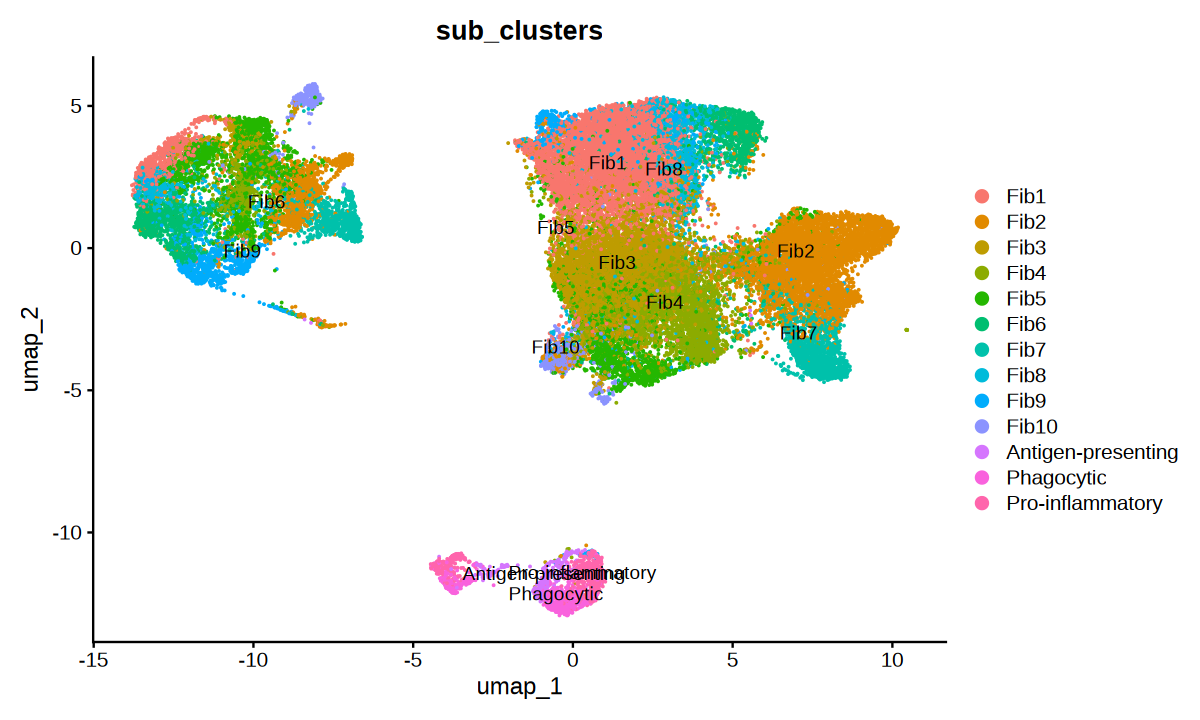

In [14]:
options(repr.plot.height = 6, repr.plot.width = 10)

DimPlot(obj, group.by = "sub_clusters", label = TRUE)

In [15]:
saveRDS(obj, glue::glue("{out_dir}/obj.rds"))